<a href="https://colab.research.google.com/github/Labibbib/Case-Study-03-Group-F/blob/main/CS3_part4_DecisionTreeRegression_GroupF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install dan import library yang diperlukan

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

# Load data

In [10]:
file_ = 'data/Ashrae_Energy_Mean.csv'
try: #Loading Locally
    df = pd.read_csv(file_)
except Exception as err_:
    print(err_, " Trying to load data from GitHub.")
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/Ashrae_Energy_Mean.csv
    df = pd.read_csv(file_)

print(df.shape)
df.head()

[Errno 2] No such file or directory: 'data/Ashrae_Energy_Mean.csv'  Trying to load data from GitHub.
--2024-11-24 15:27:03--  https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/Ashrae_Energy_Mean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241207 (236K) [text/plain]
Saving to: ‘data/Ashrae_Energy_Mean.csv’

Ashrae_Energy_Mean. 100%[===================>] 235.55K  --.-KB/s    in 0.1s    

2024-11-24 15:27:04 (1.55 MB/s) - ‘data/Ashrae_Energy_Mean.csv’ saved [241207/241207]

(1413, 12)


,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   year_built          663 non-null    float64
 4   floor_count         352 non-null    float64
 5   air_temperature     1413 non-null   float64
 6   cloud_coverage      1396 non-null   float64
 7   dew_temperature     1413 non-null   float64
 8   precip_depth_1_hr   1237 non-null   float64
 9   sea_level_pressure  1324 non-null   float64
 10  wind_direction      1413 non-null   float64
 11  wind_speed          1413 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 132.6+ KB


# Statistika deskriptif

In [12]:
df.describe(include='all')

,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,1413.000000,1413,1413.000000,663.000000,352.000000,1413.000000,1396.000000,1413.000000,1237.000000,1324.000000,1413.000000,1413.000000
unique,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,185.383188,NaN,92204.792640,1968.170437,3.738636,15.697154,2.166618,8.259831,1.187860,1016.466990,175.351051,3.564617
std,374.899500,NaN,111412.340117,31.026539,3.336731,5.416736,1.461644,4.625295,1.478667,1.921973,24.921236,0.737746
min,0.000400,NaN,283.000000,1900.000000,1.000000,7.572136,0.059266,-0.304675,0.155325,1011.436563,123.388701,2.157103
25%,27.224943,NaN,22949.000000,1949.500000,1.000000,11.058629,0.665832,4.512823,0.775686,1016.404579,153.629430,3.100911
50%,74.933148,NaN,57673.000000,1970.000000,3.000000,15.204244,2.083712,8.285693,0.895980,1016.797495,184.295922,3.619547
75%,182.884848,NaN,115288.000000,1995.500000,5.000000,21.325261,2.998727,9.834399,1.033215,1017.949437,187.301104,3.905433


# Preprocessing

## Mengoreksi tipe variabel

In [13]:
df['primary_use'] = df['primary_use'].astype('category')

## Missing value

In [14]:
missing_values = df.isnull().sum()  # Menghitung jumlah missing value per kolom
missing_percentage = (missing_values / len(df)) * 100  # Menghitung persentase missing value

# Menampilkan hasilnya dalam bentuk DataFrame
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data[missing_data['Percentage']>0.5])

# Dapat dilihat bahwa terdapat variabel yang memiliki missing value lebih dari 50%
# yaitu year_built dan floor_count

                    Missing Values  Percentage
year_built                     750   53.078556
floor_count                   1061   75.088464
cloud_coverage                  17    1.203114
precip_depth_1_hr              176   12.455768
sea_level_pressure              89    6.298655


In [15]:
# Menghapus missing value yang lebih dari 50%
df.drop(columns=['year_built','floor_count'], inplace=True)

In [16]:
# Imputasi kolom yang masih ada missing value dengan
for kolom in ['cloud_coverage','precip_depth_1_hr','sea_level_pressure']:
  df.loc[:, kolom].fillna(df.loc[:, kolom].median(), inplace=True)

<ipython-input-16-a62a1d894a2c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.loc[:, kolom].fillna(df.loc[:, kolom].median(), inplace=True)


## Memeriksa noise dari masing-masing variabel

In [17]:
for col in df.columns:
    print(f'{col}: {df[col].unique()}','\n')
    print('--'*70)


meter_reading: [237.7491275  118.55374309  23.62649987 ...   7.21134691 187.11799411
   3.33859478] 

--------------------------------------------------------------------------------------------------------------------------------------------
primary_use: ['Education', 'Lodging/residential', 'Office', 'Entertainment/public assembly', 'Other', ..., 'Healthcare', 'Utility', 'Technology/science', 'Manufacturing/industrial', 'Services']
Length: 16
Categories (16, object): ['Education', 'Entertainment/public assembly',
                          'Food sales and service', 'Healthcare', ..., 'Services', 'Technology/science',
                          'Utility', 'Warehouse/storage'] 

--------------------------------------------------------------------------------------------------------------------------------------------
square_feet: [ 7432  2720  5376 ... 11265 29775 92271] 

---------------------------------------------------------------------------------------------------------------------

## Outliers

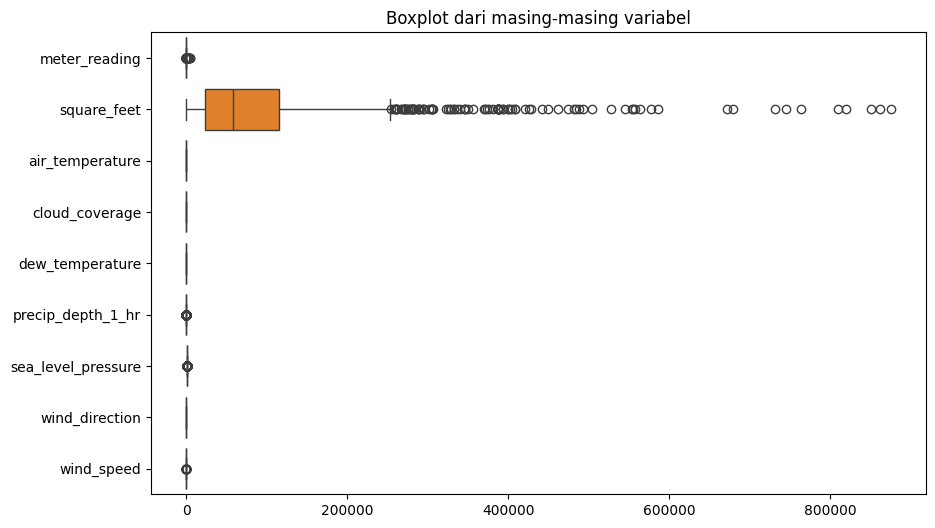

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot dari masing-masing variabel')
plt.show()

Karena kita ingin menggunakan decision tree regression yang robust terhadap outlier, maka outliernya tidak kita buang

## Memilih kolom yang relevan
Karena decision tree regression hanya bisa dengan variabel numerik, maka akan dipilih hanya variabel numerik saja

In [19]:
num_col = df.select_dtypes(include=['number']).columns
df_num = df[num_col]

In [20]:
df_num.columns

Index(['meter_reading', 'square_feet', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed'],
      dtype='object')

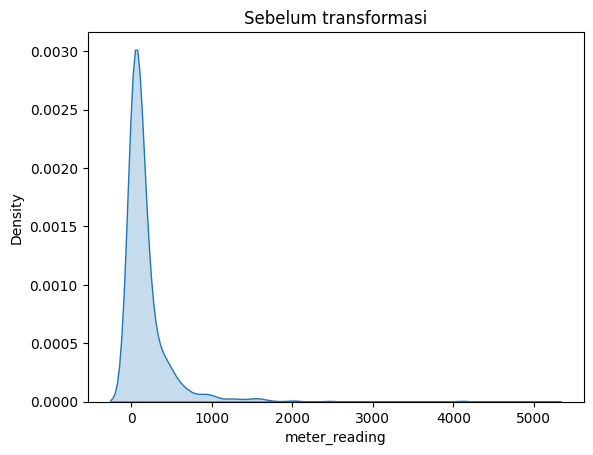

tingkat skewness: 6.545827017861556


In [21]:
from scipy.stats import skew

sns.kdeplot(data=df_num['meter_reading'], fill=True)
plt.title('Sebelum transformasi')
plt.show()

print('tingkat skewness:',skew(df_num['meter_reading'], nan_policy='omit'))
# variabel target 'meter_reading' terlihat ada skew yang signifikan

In [22]:
# Mencoba transformasi variabel target 'meter_reading' dengan log
df_num['meter_reading_log'] = np.log1p(df_num['meter_reading'])

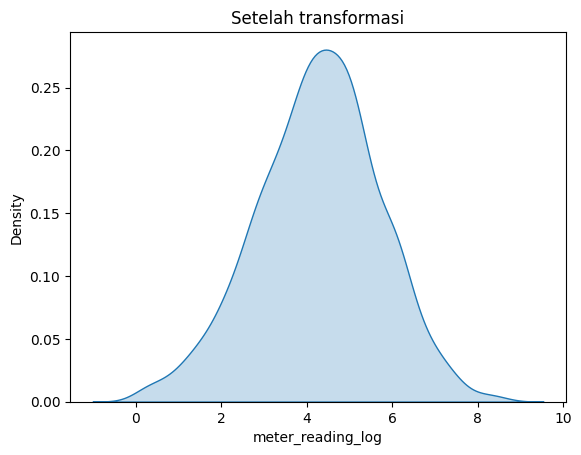

In [23]:
sns.kdeplot(data=df_num['meter_reading_log'], fill=True)
plt.title('Setelah transformasi')
plt.show()

In [24]:
df_num.corr()

,meter_reading,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,meter_reading_log
meter_reading,1.000000,0.583356,-0.034220,0.010253,-0.017421,0.389051,-0.009158,-0.001357,-0.073006,0.641399
square_feet,0.583356,1.000000,-0.022617,-0.045178,-0.076130,0.139779,-0.076230,-0.075351,-0.125481,0.610081
air_temperature,-0.034220,-0.022617,1.000000,0.096228,0.569026,-0.358352,-0.312447,-0.756898,-0.600079,0.015635
cloud_coverage,0.010253,-0.045178,0.096228,1.000000,0.095319,-0.080962,0.183606,0.149270,0.413021,-0.026851
dew_temperature,-0.017421,-0.076130,0.569026,0.095319,1.000000,-0.130875,0.453717,-0.471817,-0.231857,-0.046928
precip_depth_1_hr,0.389051,0.139779,-0.358352,-0.080962,-0.130875,1.000000,0.175911,0.183593,0.027020,0.160341
sea_level_pressure,-0.009158,-0.076230,-0.312447,0.183606,0.453717,0.175911,1.000000,0.150143,0.196777,-0.068446
wind_direction,-0.001357,-0.075351,-0.756898,0.149270,-0.471817,0.183593,0.150143,1.000000,0.842631,-0.113094
wind_speed,-0.073006,-0.125481,-0.600079,0.413021,-0.231857,0.027020,0.196777,0.842631,1.000000,-0.183115
meter_reading_log,0.641399,0.610081,0.015635,-0.026851,-0.046928,0.160341,-0.068446,-0.113094,-0.183115,1.000000


# Pembuatan model

In [25]:
# Splittig data training dan testing
X = df_num.drop(columns=['meter_reading','meter_reading_log'])
y = df_num['meter_reading_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('data training:', X_train.shape)
print('data testing:', X_test.shape)

data training: (1130, 8)
data testing: (283, 8)


In [26]:
model_dt = DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_split=20, min_samples_leaf=4)
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=20,
                      random_state=42)

In [27]:
# Prediksi dengan data testing
y_pred = model_dt.predict(X_test)

# Evaluasi model
mse_pred = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse_pred}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.7370437628064054
R-squared (R2): 0.6711581604525118


In [28]:
# Fitur2 yang penting
f_imp = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_dt.feature_importances_}).sort_values(by='importance', ascending=False)
print(f_imp)

              feature  importance
0         square_feet    0.833949
3     dew_temperature    0.076463
1     air_temperature    0.021146
6      wind_direction    0.018591
5  sea_level_pressure    0.017103
4   precip_depth_1_hr    0.016339
2      cloud_coverage    0.008729
7          wind_speed    0.007680


In [29]:
# Evaluasi pada data training
y_pred_train = model_dt.predict(X_train)
mse_pred_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Evaluasi pada data testing
y_pred_test = model_dt.predict(X_test)
mse_pred_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Training- MSE: {mse_pred_train}, R²: {r2_train}')
print(f'Testing- MSE: {mse_pred_test}, R²:{r2_test}')

Training- MSE: 0.5244435834622465, R²: 0.7415843923601262
Testing- MSE: 0.7370437628064054, R²:0.6711581604525118


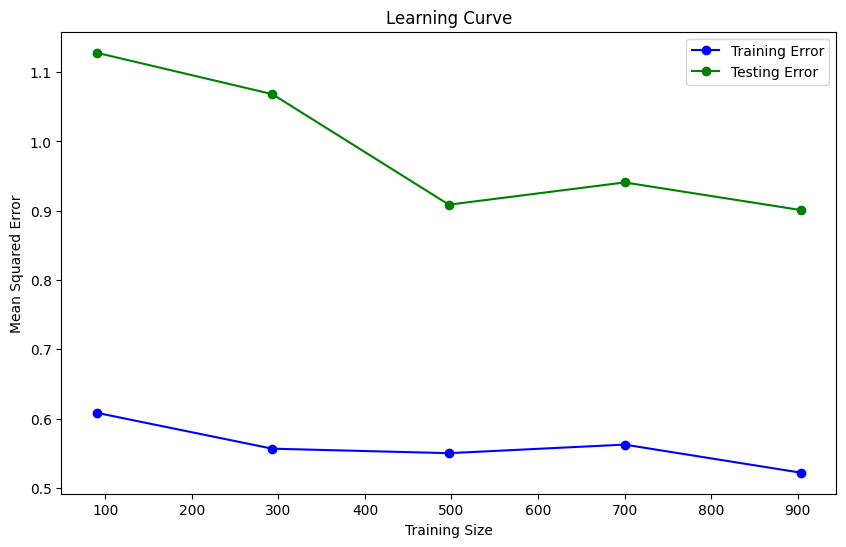

In [30]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib.pyplot

train_sizes, train_scores, test_scores = learning_curve(
    model_dt, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Rata-rata skor
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Error')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Testing Error')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Rentang parameter yang ingin diuji
param_grid = {
    'max_depth': [3, 5, 7, 10, None],         # Batas kedalaman pohon
    'min_samples_split': [2, 5, 10, 20],      # Jumlah minimum sampel untuk split
    'min_samples_leaf': [1, 2, 5, 10],        # Jumlah minimum sampel per leaf
    'max_leaf_nodes': [None, 1,0, 20, 50],     # Batas jumlah leaf nodes
    'ccp_alpha': [0.0, 0.01, 0.02, 0.05]      # Nilai alpha untuk pruning
}

# Grid Search dengan Cross-Validation
grid_search = GridSearchCV(
    model_dt,
    param_grid,
    cv=5,                   # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Metrik evaluasi (bisa disesuaikan)
    n_jobs=-1,              # Gunakan semua core CPU untuk mempercepat
    verbose=1               # Menampilkan proses
)

# Fit model dengan grid search
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
Best Parameters: {'ccp_alpha': 0.0, 'max_depth': 5, 'max_leaf_nodes': 50, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best Score: -0.8178570693591809


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3200 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1600 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

In [32]:
# Buat model baru dengan best param
model_dt_new = DecisionTreeRegressor(random_state=42, **grid_search.best_params_)
model_dt_new.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=50, min_samples_leaf=5,
                      min_samples_split=20, random_state=42)

In [33]:
# Prediksi dengan data testing
y_pred_new = model_dt_new.predict(X_test)

# Evaluasi model
mse_pred_new = mean_squared_error(y_test, y_pred_new)
r2 = r2_score(y_test, y_pred_new)

print(f'Mean Squared Error (MSE): {mse_pred_new}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.644194749370065
R-squared (R2): 0.7125839779132254


In [34]:
# Fitur2 yang penting
f_imp_new = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model_dt_new.feature_importances_}).sort_values(by='importance', ascending=False)
print(f_imp_new)

              feature  importance
0         square_feet    0.860992
3     dew_temperature    0.077527
1     air_temperature    0.018491
4   precip_depth_1_hr    0.015736
6      wind_direction    0.010741
5  sea_level_pressure    0.008807
7          wind_speed    0.007707
2      cloud_coverage    0.000000


In [35]:
# Evaluasi pada data training
y_pred_train_new = model_dt_new.predict(X_train)
mse_pred_train_new = mean_squared_error(y_train, y_pred_train_new)
r2_train_new = r2_score(y_train, y_pred_train_new)

# Evaluasi pada data testing
y_pred_test_new = model_dt_new.predict(X_test)
mse_pred_test_new = mean_squared_error(y_test, y_pred_test_new)
r2_test_new = r2_score(y_test, y_pred_test_new)

print(f'Training- MSE: {mse_pred_train_new}, R²: {r2_train_new}')
print(f'Testing- MSE: {mse_pred_test_new}, R²:{r2_test_new}')

Training- MSE: 0.6716671711341763, R²: 0.6690410834764495
Testing- MSE: 0.644194749370065, R²:0.7125839779132254


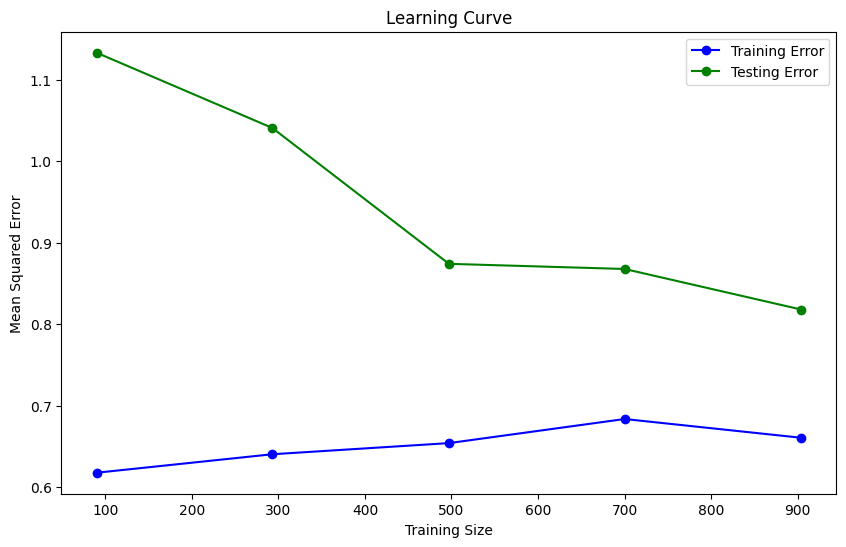

In [36]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib.pyplot

train_sizes, train_scores, test_scores = learning_curve(
    model_dt_new, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

# Rata-rata skor
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Error')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Testing Error')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


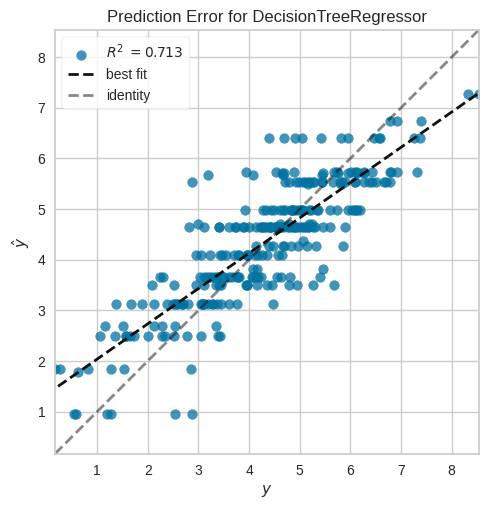

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [37]:
# Prediksi error
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model_dt_new)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


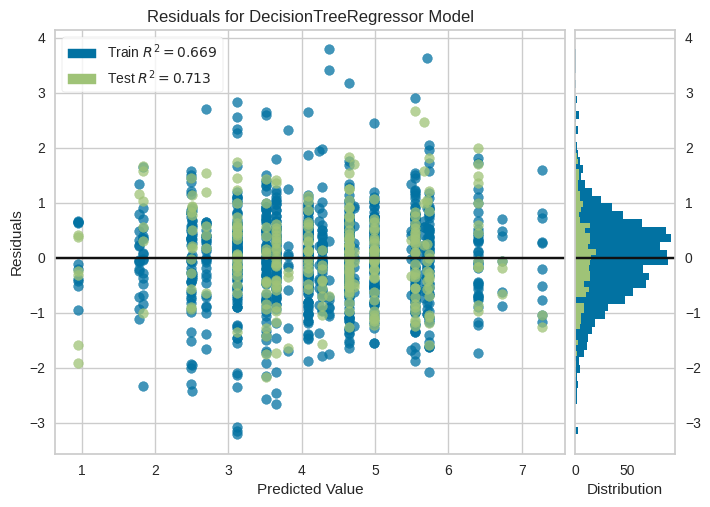

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [38]:
# Residual plot
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model_dt_new)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

Dari hasil plot diperoleh bahwa:

- Model Decision Tree Regressor cukup baik dalam memprediksi data, terlihat dari nilai R² yang lumayan tinggi, khususnya pada data testing.
- Namun, ada beberapa titik outlier (titik yang jauh dari garis nol) yang menunjukkan prediksi yang meleset signifikan.
- Distribusi residuals yang mendekati simetris di sekitar nol menunjukkan model tidak memiliki bias sistematis dalam memprediksi terlalu tinggi atau rendah.

In [39]:
from sklearn.metrics import mean_squared_log_error

# Menghitung RMSLE untuk data training dan testing
rmsle_train = np.sqrt(mean_squared_log_error(y_train, y_pred_train_new))
rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_pred_test_new))

# Menampilkan hasil RMSLE
print(f'RMSLE untuk Training Data: {rmsle_train}')
print(f'RMSLE untuk Testing Data: {rmsle_test}')

RMSLE untuk Training Data: 0.18804062923884293
RMSLE untuk Testing Data: 0.18856338281982507


Hasil RMSLE di data training dan testing hampir sama, ini mengindikasikan bahwa model Decision Tree Regression dapat diandalkan untuk memberikan hasil yang baik dalam data prediksi konsumsi energi gedung.

In [40]:
# Cross validasi model
from sklearn.model_selection import cross_val_score

cross_val_scores_MAE = cross_val_score(model_dt_new, X, y, cv=5, scoring='neg_mean_absolute_error')
cross_val_scores_MSE = cross_val_score(model_dt_new, X, y, cv=5, scoring='neg_mean_squared_error')

# Model Baseline (Mean Model)
mean_value = y_train.mean()
baseline_predictions = np.full_like(y_test, mean_value)

# Menghitung MSE untuk baseline
baseline_MAE = mean_absolute_error(y_test, baseline_predictions)
baseline_MSE = mean_squared_error(y_test, baseline_predictions)

print(f"Baseline Model MSE: {baseline_MSE}")
print(f"Cross-validation MSE: {-cross_val_scores_MSE.mean()}")
print(f"Baseline Model MAE: {baseline_MAE}")
print(f"Cross-validation MAE: {-cross_val_scores_MAE.mean()}")

Baseline Model MSE: 2.2421588169903903
Cross-validation MSE: 1.5210914721913154
Baseline Model MAE: 1.186277816834257
Cross-validation MAE: 0.9649655982590659


Dapat diperhatikan dari hasil cross validasi bahwa model yang dibuat lebih baik karena MAE dan MSE nya lebih kecil daripada model baseline yang menggunakan mean

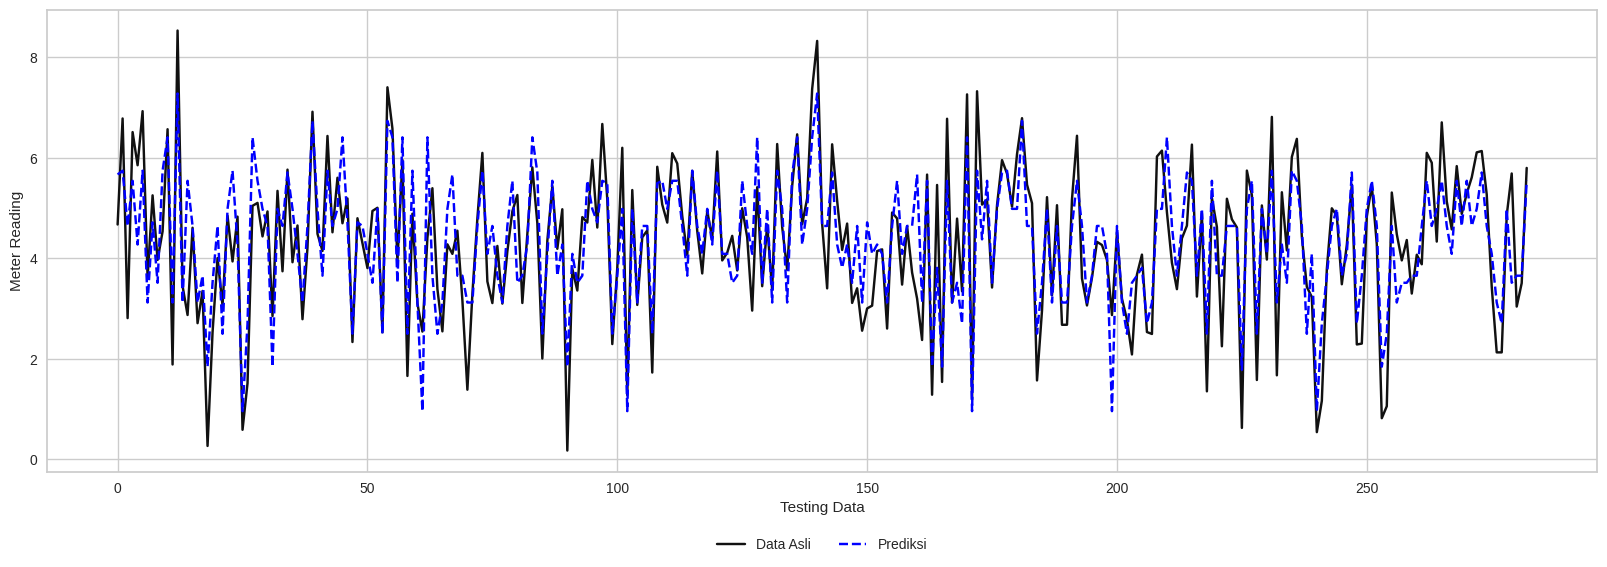

In [41]:
# Membuat plot dari data asli dengan data prediksi metered_reading
plt.figure(figsize=(20, 6))
pan = range(len(X_test))

# Plotnya
plt.plot(pan, y_test, label='Data Asli', color='k', linestyle='-')
plt.plot(pan, y_pred_test_new, label='Prediksi', color='blue', linestyle='--')
plt.ylabel('Meter Reading')
plt.xlabel('Testing Data')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol=2, frameon=False)
plt.show()

Dapat dilihat dari plot antara prediksi dengan data observasi bahwa hasil prediksi mendekati data aslinya, walaupun masih terdapat error

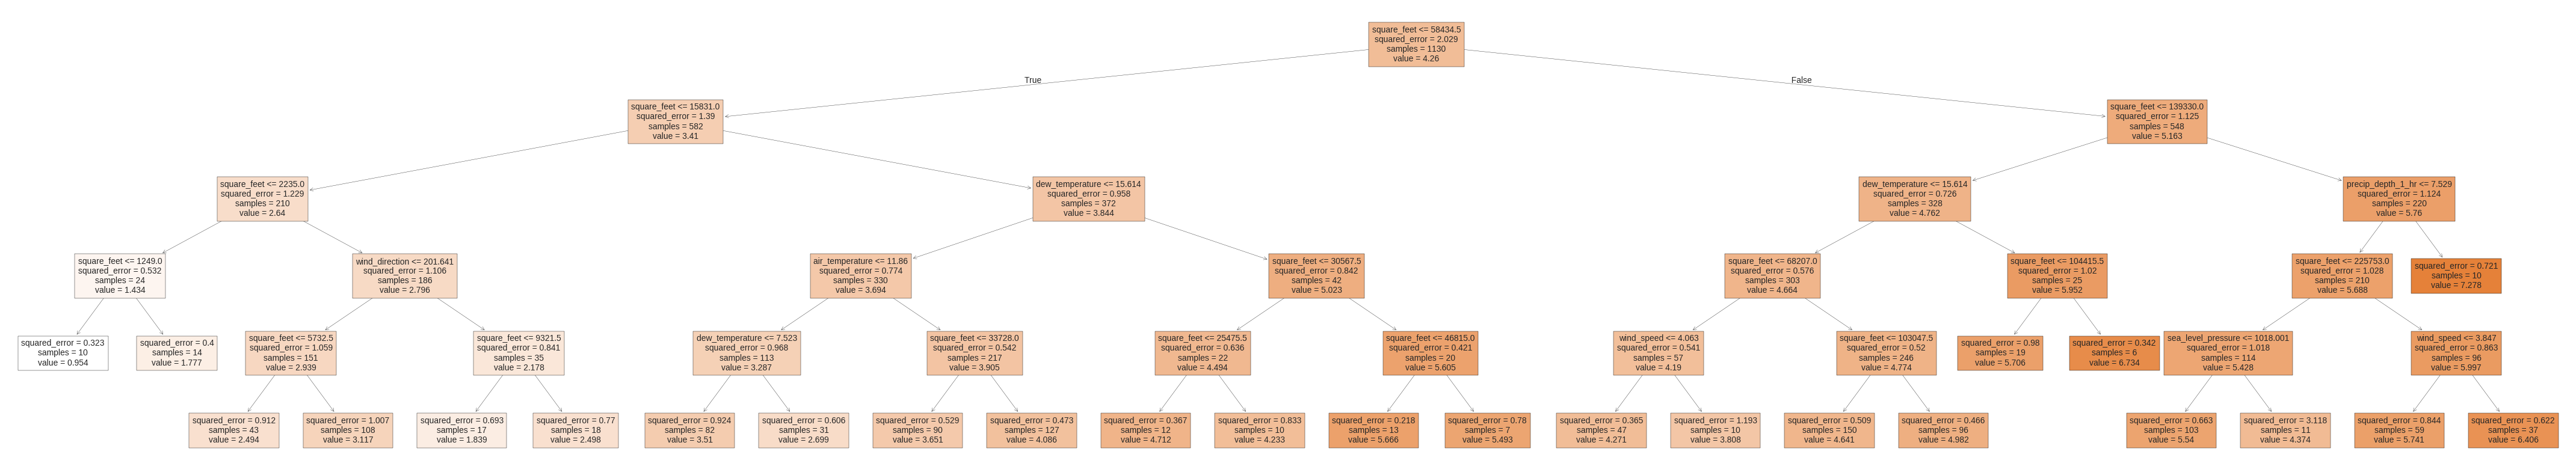

In [42]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(55, 10))
plot_tree(model_dt_new, filled=True, feature_names=X.columns, fontsize=10)
plt.show()

# Kesimpulan

In [43]:
print(f_imp_new)

              feature  importance
0         square_feet    0.860992
3     dew_temperature    0.077527
1     air_temperature    0.018491
4   precip_depth_1_hr    0.015736
6      wind_direction    0.010741
5  sea_level_pressure    0.008807
7          wind_speed    0.007707
2      cloud_coverage    0.000000


Hasil dari model dengan menggunakan decision tree yaitu dapat melihat variabel mana yang paling berpengaruh atau penting dalam menentukan meter_reading atau konsumsi energi dalam KWH.

1. **Ukuran bangunan (square_feet)** - Importance: 0.860992

  - Insight: Ukuran bangunan memiliki pengaruh yang sangat signifikan terhadap konsumsi energi, dengan nilai importance yang sangat mendominasi. Dimana ini merupakan hal yang trivial, semakin besar bangunan, maka semakin tinggi konsumsi energinya.
  - Rekomendasi:
    - Pengelola gedung bisa menggunakan strategi yang dapat mengoptimalisasi energi berdasarkan ukuran gedung. Misalnya, gedung yang cukup besar bisa menerapkan pemanas atau pendingin ruangan yang lebih efisien, menggunakan lampu LED, dan ventilasi atau insulasi yang lebih baik untuk mengurangi konsumsi energi.
    - Membagi bangunan yang besar menjadi beberapa zona energi yang terpisah, sehingga area yang tidak dipakai bisa dipadamkan untuk mengurangi konsumsi energinya.

2. **Suhu titik embun (dew_temperature)** - Importance: 0.0775

  - Insight: Suhu titik embun variabel kedua yang paling berpengaruh, yang menunjukkan bahwa kondisi kelembaban udara berdampak kepada konsumsi energi, yaitu pada sistem pendingin atau pemanas untuk mengatur kelembaban di dalam gedung.
  - Rekomendasi:
    - Mencoba untuk instalasi atau optimalisasi hudifier atau dehumidifier yang mempunyai sensor otomatis untuk mengontrol kelembaban udara secara efisien.

3. **Suhu udara (air_temperature)** - Importance: 0.018491

  - Insight: Suhu udara merupakan variabel ketiga yang paling berpengaruh, variabel ini berhubungan dengan suhu titik embun (https://en.wikipedia.org/wiki/Dew_point).
  - Rekomendasi:
    - Karena suhu udara berhubungan dengan titik embun, maka gunakan juga humidifire atau dehumidifier yang memiliki sensor otomatis untuk mengatur suhu udara di dalam ruang gedung.

4. **Curah hujan (precip_depth_1_hr)** - Importance: 0.015736

  - Insight: Curah hujan memiliki dampak yang tidak terlalu signifikan pada konsumsi energi. Kemungkinan pada model ini curah hujan memiliki keterkaitan dengan suhu udara, ini dapat dilihat pada korelasi yang minus artinya jika suhu udara naik maka curah hujan akan menurun.

5. **Arah angin dan kecepatan angin (wind_direction & wind_speed)** - Importance: 0.0107 & 0.0077

  Arah angin dan kecepatan angin juga mempengaruhi konsumsi energi walaupun persentasenya sangat kecil.

6. **Tekanan permukaan laut (sea_level_pressure) & Persentase langit yang tertutup awan (cloud_coverage)** - Importance: 0.007707 & 0.0000
  
  Kedua variabel ini tidak signifikan terhadap konsumsi energi karena persentase feature importancenya yang kecil.

# Kesimpulan akhir dari semua model

In [44]:
from prettytable import PrettyTable

score_table = PrettyTable(["Nama Model","Training RMSLE","Testing RMSLE","Training R²","Resting R²"])
score_table.add_row(["Random forest","0.17046","0.17720","0.74616","0.74223"])
score_table.add_row(["kNN","0.1480","0.1624","0.7355","0.6922"])
score_table.add_row(["Decicion tree","0.18804","0.18856","0.66904","0.71258"])
score_table.add_row(["Linear regression","-","-","-","-"])

print(score_table)
print("Untuk regresi linear, kami menggunakan evaluasi adjusted R² dan RMSE","\n",
      "Dengan nilainya berturut turut 45.03394 & 0.541348")

+-------------------+----------------+---------------+-------------+------------+
|     Nama Model    | Training RMSLE | Testing RMSLE | Training R² | Resting R² |
+-------------------+----------------+---------------+-------------+------------+
|   Random forest   |    0.17046     |    0.17720    |   0.74616   |  0.74223   |
|        kNN        |     0.1480     |     0.1624    |    0.7355   |   0.6922   |
|   Decicion tree   |    0.18804     |    0.18856    |   0.66904   |  0.71258   |
| Linear regression |       -        |       -       |      -      |     -      |
+-------------------+----------------+---------------+-------------+------------+
Untuk regresi linear, kami menggunakan evaluasi adjusted R² dan RMSE 
 Dengan nilainya berturut turut 45.03394 & 0.541348


Dari beberapa score test tersebut diperoleh beberapa observasi:

1. Dari semua model yang dicoba, kNN adalah model yang memiliki performa terbaik dengan skor RMSLE 0.1480 di data training dan 0.1624 di data testing.
2. Pada model regresi linear, kami tidak menggunakan transformasi, sehingga evaluasi yang kami gunakan adalah R² dan RMSLE.
3. Model decision tree memiliki performa paling terbelakang dari semua model yang kami tes. Tetapi sebagai kelompok data mining, kami memilih decision tree ini karena memiiliki interpretasi atau insight yang tidak dimiliki model lain.